In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

## 第二章：数据清洗分组与基本可视化
在进行数据分析和建模的过程中，基本上80%的时间用于数据准备中：加载、清理、转换和重新排列等，利用Python进行各种形式的特殊数据处理。而Pandas和内置的Python语言功能是较高级、灵活的工具集，能够将数据处理为正确形式。

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('train.csv')
df.head().append(df.tail())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


## 1. 数据清洗与准备
一般拿到的数据通常是不干净的，所谓的不干净，就是数据中有缺失值，有一些异常点等，需要经过一定的处理才能继续做后面的分析或建模，所以拿到数据的第一步是进行数据清洗，本章将学习缺失值、重复值、字符串和数据转换等操作，将数据清洗成可以分析或建模的样子。

本章节为数据操作的第一部分“数据清洗与准备”，具体分为以下内容：
- 处理缺失值
- 数据转换
- 文本转换

### 1.1 处理缺失值
缺失值在很多数据分析应用中出现，对于数值型数据，pandas使用*浮点值*`NaN`表示缺失值，是容易检测到的标识，而`None`也被当做NA（缺失值）处理。
- 注：`None`是一个python特殊的数据类型，而`NaN`却是一个特殊的`float`.

常见的`NA`值处理方法：

| 函数名      | 描述         | 应用        |
|:-----------:| :-------------:|:-------------:|
| `dropna` | 根据标签的值是否为缺失值进行筛选，并允许丢失的数据量来确定阈值  | `df.dropna(axis=0,how='any/all',thresh=None,subset=None,inplace=True)`:行或列；有缺失值/所有值都缺失；至少有thresh个缺失值；subset查看list是否有缺失值；代替 |
| `fillna` | 用值填充缺失的数据或用插值方法（`ffill`or`bfill`前一节有详细介绍可供参考）  | `df.fillna(value=None,method=None,axis=None,inplace=False,limit=None,**kwargs)`:填充值；ffill/bfill向前/后填充；行/列；是否替代；limit不怎么用，缺失值个数限制；查看list是否有缺失值 |
| `isnull` | 判断是否为缺失值，返回布尔值  | `df.isnull()` |
| `notnull` | isnull的反函数  | `df.notnull()` |

### 1.1.1 观察缺失值

In [4]:
###观察缺失值并处理
'''方法：info()和isnull().sum()，前者不仅可以观察是否有缺失值，还可以看特征类型，缺失值是个数未满，具体个数需要计算；
后者用法是直接显现缺失个数'''
df.info()
df.isnull().sum()

'方法：info()和isnull().sum()，前者不仅可以观察是否有缺失值，还可以看特征类型，缺失值是个数未满，具体个数需要计算；\n后者用法是直接显现缺失个数'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
###对于含有缺失值的这三列可以看看它们拥有多少特征值
df.nunique()
'''少的话可以看看对应分布，实际为88,147,3并不少'''

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

'少的话可以看看对应分布，实际为88,147,3并不少'

#### 小结
对特征进行观察，可以把特征大概分为两大类：  
- 数值型特征：Survived ，Pclass， Age ，SibSp， Parch， Fare，其中Survived， Pclass为离散型数值特征，Age，SibSp， Parch， Fare为连续型数值特征。
- 文本型特征：Name， Sex， Cabin，Embarked， Ticket，其中Sex， Cabin， Embarked， Ticket为类别型文本特征。

#### 上述筛选出了对应的缺失值列，下面要对其进行处理，一般缺失值的处理方法有两种：过滤或补全。

### 1.1.2 过滤缺失值
有多种过滤方法，例如可以用pandas.isnull和布尔值索引手动滤（但比较麻烦），也可以利用dropna.

`df.dropna(axis=0,how='any/all',thresh=None,subset=None,inplace=False)`:

- `axis`取0为行，取1为列
- `how`取any表示有缺失值，all表示所有值都缺失
- `thresh`表示至少有个缺失值再删除
- `subset`查看对应的list是否有缺失值
- `inplace`True为代替,False表示不代替。

In [6]:
### 删除三列都为缺失值的数据集

#方法1：因为是三列，所以至少3个缺失值，引用thresh
clean_1 = df.dropna(thresh=3)
clean_1.info()

#方法2：因为三列名称已知，所以可引用subset+how
clean_2 = df.dropna(how='all',subset=['Age','Cabin','Embarked'])
clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived

查看了对应的类型即数量，发现上述方法似乎并不成功，缺失值个数依旧不变。是不是三列的缺失值实际都不在同一行中呢？下面对缺失值的行进行表示。

In [7]:
### 缺失值对应的行显现
for columname in df.columns:
    if df[columname].count() != len(df.index):
         loc = df[columname][df[columname].isnull().values==True].index.tolist()
         print('列名："{}", 第{}行位置有缺失值'.format(columname,loc))    

列名："Age", 第[5, 17, 19, 26, 28, 29, 31, 32, 36, 42, 45, 46, 47, 48, 55, 64, 65, 76, 77, 82, 87, 95, 101, 107, 109, 121, 126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186, 196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264, 270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330, 334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388, 409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457, 459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507, 511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563, 564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612, 613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680, 692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768, 773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837, 839, 846, 849, 859, 863, 868, 878, 888]行位置有缺失值
列名："Cabin", 第[0, 2, 4, 5, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 26, 28, 29, 30, 32, 33, 34, 35, 36, 

**小结：**
1. 根据最少的缺失值行数进行对比发现，确实三列的缺失值都不在同一行内，所以不用删除三列确实值的列。
2. 包含缺失值的列为年龄，舱位和进入港口，最后一列仅有2个缺失值，影响较少。前两者虽然确实值较多，但对于业务分析的影响权重较大，不能贸然删除。
3. 接下来可以尝试补全缺失值的方法。

### 1.1.3 补全缺失值

补全缺失值可以采取先判断是否为缺失值，返回布尔值再另其等于对应的补值，但是有对应的弊端。例如如果为`None`或`np.nan`都会忽略另一个类型。而已经在DataFrame中显示为NaN值的可能原数据类型并非np.nan.

另外，单纯用isnull()判断又不方便后续操作，相比较而言`fillna`函数更方便应用。

`df.fillna(value=None,method=None,axis=None,inplace=False,limit=None,**kwargs)`:

- `value`:填充值
- `method`为`ffill/bfill`表示向前/后填充
- `axis`0/1表示行/列的选择
- `inplace`True/False是否替代
- `limit`不怎么用，缺失值个数限制,查看list是否有缺失值

In [8]:
### 方式1：将年龄的缺失值用均值代替
age_df_mean = df.fillna(df['Age'].mean()) 
#抽取一个Age缺失值行看看
age_df_mean.loc[5,'Age']  #因为Age的第一个空值是第5行（索引角度）

29.69911764705882

In [9]:
### 方式2：按照一定逻辑填充，例如按照价位相似填充年龄，类似分类填充
'''简单方法：按照价格排列向上或向下填充'''
df1 = df.sort_values(by='Fare',ascending=False)  #按照票价倒序排列
age_df_fill = df1.fillna(method='ffill')         # 向前填充 
age_df_fill['Age'].isnull().sum()                #验证一下

'简单方法：按照价格排列向上或向下填充'

0

### 1.1.4 缺失值其他处理方法
其实处理缺失值是数据分析中最为重要的环节之一，好的处理会为不同的算法带来更高的效益。除了上述常见的均值和同类值填充，下面介绍另外几种理论型的缺失值处理方法。
- **极大似然估计（ML）**
 - 在缺失类型为随机缺失的条件下，假设模型对于完整的样本是正确的，那么通过观测数据的*边际分布*可以对未知参数进行极大似然估计（Little and Rubin）。这种方法也被称为忽略缺失值的极大似然估计，对于极大似然的参数估计实际中常采用的计算方法是**期望值最大化(Expectation Maximization，EM）**。该方法比删除个案和单值插补更有吸引力，它一个**重要前提：适用于大样本**。有效样本的数量足够以保证ML估计值是*渐近无偏*的并*服从正态分布*。但是这种方法可能会陷入局部极值，收敛速度也不是很快，并且计算很复杂。
- **多重插补（MI）**
 - 多值插补的思想来源于贝叶斯估计，认为待插补的值是随机的，它的值来自于已观测到的值。具体实践上通常是估计出待插补的值，然后再加上不同的噪声，形成多组可选插补值。根据某种选择依据，选取最合适的插补值。 
 
 - 多重插补方法分为三个步骤：①为每个空值产生一套可能的插补值，这些值反映了无响应模型的不确定性；每个值都可以被用来插补数据集中的缺失值，产生若干个完整数据集合。②每个插补数据集合都用针对完整数据集的统计方法进行统计分析。③对来自各个插补数据集的结果，根据评分函数进行选择，产生最终的插补值。

 - 假设一组数据，包括三个变量Y1，Y2，Y3，它们的联合分布为正态分布，将这组数据处理成三组，A组保持原始数据，B组仅缺失Y3，C组缺失Y1和Y2。在多值插补时，对A组将不进行任何处理，对B组产生Y3的一组估计值（作Y3关于Y1，Y2的回归），对C组作产生Y1和Y2的一组成对估计值（作Y1，Y2关于Y3的回归）。 

 - 当用多值插补时，对A组将不进行处理，对B、C组将完整的样本随机抽取形成为m组（m为可选择的m组插补值），每组个案数只要能够有效估计参数就可以了。对存在缺失值的属性的分布作出估计，然后基于这m组观测值，对于这m组样本分别产生关于参数的m组估计值，给出相应的预测即，这时采用的**估计方法为极大似然法，在计算机中具体的实现算法为期望最大化法（EM）**。对B组估计出一组Y3的值，对C将利用 Y1,Y2,Y3它们的联合分布为正态分布这一前提，估计出一组(Y1，Y2）。 

 - 上例中**假定了Y1,Y2,Y3的联合分布为正态分布**。这个假设是人为的，但是已经通过验证（Graham和Schafer于1999），非正态联合分布的变量，在这个假定下仍然可以估计到很接近真实值的结果。 

 - 多重插补和贝叶斯估计的思想是一致的，但是多重插补弥补了贝叶斯估计的几个不足。 

 - (1)贝叶斯估计以极大似然的方法估计，极大似然的方法要求模型的形式必须准确，如果参数形式不正确，将得到错误得结论，即先验分布将影响后验分布的准确性。而多重插补所依据的是大样本渐近完整的数据的理论，在数据挖掘中的数据量都很大，先验分布将极小的影响结果，所以先验分布的对结果的影响不大。 

 - (2)贝叶斯估计仅要求知道未知参数的先验分布，没有利用与参数的关系。而多重插补对参数的联合分布作出了估计，利用了参数间的相互关系。 
 
- 以上四种插补方法，对于缺失值的类型为随机缺失的插补有很好的效果。两种均值插补方法是最容易实现的，也是以前人们经常使用的，但是它对样本存在极大的干扰，尤其是当插补后的值作为解释变量进行回归时，参数的估计值与真实值的偏差很大。相比较而言，极大似然估计和多重插补是两种比较好的插补方法，与多重插补对比，极大似然缺少不确定成分，所以越来越多的人倾向于使用多值插补方法。

### 1.2 数据转换
前面对缺失值的观察即处理有了一定的了解，下面对于数据的操作如过滤、清洗和其他转换进行案例讲解。

常见的数据转换操作如下：
- 删除重复
- 映射转换
- 替代
- 重命名轴索引
- 离散化和分箱
- 检测过滤异常值
- 置换和随机抽样
- 计算指标/虚拟变量

### 1.2.1删除重复值
数据中由于各种原因会出现重复值，有的不必要理会，但有的重复值存在对业务分析造成一定的影响，下面对重复值进行检查操作。

In [10]:
### duplicated方法返回一个布尔值,查看下哪些列有重复值
df[df.duplicated()]
'''结果显示没有完全一样的'''

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


'结果显示没有完全一样的'

In [11]:
## 对于包含重复值的特征进行删除操作（操作熟悉下）
df_drop = df.drop_duplicates()
# 检查下是否还有重复值
df_drop.duplicated().sum()

0

In [12]:
## 对票价有重复的进行删除，并且保留后面的一项
'''由于drop_duplicates和duplicated函数都是保留第一个观测的值，可以传入参数keep'''
'''对于所有特征重复的少见，可以查看单个特征重复的并删除'''
df_drop_fare = df.drop_duplicates(['Fare'],keep='last')
df_drop_fare.info()    #确定下是否删除

'由于drop_duplicates和duplicated函数都是保留第一个观测的值，可以传入参数keep'

'对于所有特征重复的少见，可以查看单个特征重复的并删除'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 1 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  248 non-null    int64  
 1   Survived     248 non-null    int64  
 2   Pclass       248 non-null    int64  
 3   Name         248 non-null    object 
 4   Sex          248 non-null    object 
 5   Age          206 non-null    float64
 6   SibSp        248 non-null    int64  
 7   Parch        248 non-null    int64  
 8   Ticket       248 non-null    object 
 9   Fare         248 non-null    float64
 10  Cabin        83 non-null     object 
 11  Embarked     247 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 25.2+ KB


In [13]:
### 别忘顺手对清洗过得数据进行保存
df.to_csv('train_clean.csv')

### 1.2.2 使用函数或映射进行数据转换
函数或映射的数据转换可以应用`map()`函数。
- `map()`是 Python 内置的高阶函数，它接收一个函数 function 和一个 list，并通过把函数 func 依次作用在 list 的每个元素上，*得到一个新的 list*并返回。

In [14]:
###单个seq的案例
def s(x):
    return x**2
S = map(s, [1,2,3,4,5])
list(S)

## 多个seq案例
l = map(lambda x,y: (x*y,x-y),[1,2,3,4],[5,6])   #对应的前几个元素进行运算
list(l)

[1, 4, 9, 16, 25]

[(5, -4), (12, -4)]

### 1.2.3 替代值
使用fillna填充缺失值之前已用过了，可以尝试使用`replace`函数。

In [15]:
###Embarked的缺失值用N代替
df_E = df['Embarked'].replace([np.nan],['N'])
df_E.loc[61]             

'N'

### 1.2.4 重命名轴索引
之前有应用过映射map函数，重命名可以直接应用，例如`df.index.map(lambda x:...)`直接修改索引。

或者想创建数据集转换后的版本，并且不修改原版本的数据集，可以用`rename`:

`df.rename(mapper=None, index=None, columns=None, axis=None, copy=True, inplace=False, level=None)`

返回DataFrame

- `mapper, index, columns`: 映射的规则。
- `axis`：指定轴，可以是轴名称（'index'，'columns'）或数字（0,1），默认为index。
- `copy`：布尔值，默认为True，复制底层数据。
- `inplace`：布尔值，默认为False。指定是否返回新的DataFrame。如果为True，则在原df上修改，返回值为None。
- `level`：int或level name，默认为None.如果是MultiIndex，只重命名指定级别的标签。


### 1.2.5 离散化和分箱
这块是针对离散化的数据进行分箱，或者连续值进行离散化分离成区段进行分析。

下面对年龄进行分箱，看一下各个区段的其他信息。分箱有很多种分的方法，例如平均分，按照设定数据划分，按照百分比划分等等。

常用的分箱方法：

`pd.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise')`
- `x`：被切分的类数组（array-like）数据，必须是1维的（不能用DataFrame）
- `bins`：bins是被切割后的区间（或者叫“桶”、“箱”、“面元”），有3中形式：一个int型的标量、标量序列（数组）或者pandas.IntervalIndex 。一个int型的标量.  当bins为一个int型的标量时，代表将x平分成bins份。x的范围在每侧扩展0.1%，以包括x的最大值和最小值。标量序列. 标量序列定义了被分割后每一个bin的区间边缘，此时x没有扩 .pandas.IntervalIndex定义要使用的精确区间。
- `right`：bool型参数，默认为True，表示是否包含区间右部。
- `labels`：给分割后的bins打标签.
- `retbins`：bool型的参数，表示是否将分割后的bins返回，当bins为一个int型的标量时比较有用，这样可以得到划分后的区间，默认为False。
- `precision`：保留区间小数点的位数，默认为3.
- `include_lowest`：bool型的参数，表示区间的左边是开还是闭的，默认为false，也就是不包含区间左部（闭）
- `duplicates`：是否允许重复区间,默认不允许；raise：不允许，drop：允许。

`pd.qcut()`和`pd.cut()`类似，但是属于以百分比或数据的平均份数分箱。

In [16]:
### 先对Age的数据有一定的了解
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
###平均分成5个年龄段，分别从1-5表示
df['AgeBand'] = pd.cut(df['Age'],5,labels=range(1,6))
df.head()
df['AgeBand'].unique()        #查看下类别,存在缺失值Nan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


[2, 3, NaN, 4, 1, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [18]:
## 分类后保存下（养成良好习惯）
df.to_csv('train_ageb.csv')

In [19]:
###根据Age的统计，准备将连续变量Age划分为[0,20) [20,25) [25,30) [30,50) [50,80)五个年龄段，分别对应1-5表示
'''注意此次分组左闭右开'''
df['AgeBand'] = pd.cut(df['Age'],[0,20,25,30,50,80],right=False,labels=range(1,6))
df.head()
df['AgeBand'].unique()

'注意此次分组左闭右开'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4


[2, 4, 3, NaN, 5, 1]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [119]:
### 按照百分比来分类:10%,30%,50%,70%,90%,用分类1-5分别表示-qcut按照百分比或均分份数切分
'''方法1:直接将不唯一的值删掉，分位点的取值可以唯一'''
df['AgeBand'] = pd.qcut(df['Age'],[0,0.1,0.3,0.5,0.7,0.9],labels = range(1,6))
#查看下各分类有多少个
df['AgeBand'].value_counts()
df.head()

'方法1:直接将不唯一的值删掉，分位点的取值可以唯一'

4    157
2    154
5    131
3    131
1     77
Name: AgeBand, dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_65.0,Age_66.0,Age_70.0,Age_70.5,Age_71.0,Age_74.0,Age_80.0,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,0,1


In [115]:
### 方法2：用rank()排序分桶
'''相同取值对应的rank()不同，按照原始list顺序分配'''
df['AgeBand'] = pd.qcut(df['Age'].rank(method='first'),[0.0,0.1,0.3,0.5,0.7,0.9],labels = ['1','2','3','4','5'])
df['AgeBand'].value_counts()

4    143
3    143
5    142
2    142
1     72
Name: AgeBand, dtype: int64

#### 小结
- 对于百分比分箱法应用了两种，但是两种分箱后的总个数各不相同，未分箱的年龄总个数为714。
- 对于直接按照比例分箱法，总个数为650，这个方法因为没有把重复的值考虑在内，所以比714*90%=642要多才可以。
- 对于rank顺序分箱法，总个数为642，按照90%的数据去分箱，比例是对的，说明在排序之后进行分箱，NaN值不计算在内，利用rank函数的重复值排序可以对非缺失值完整分箱。

In [21]:
### 根据最值计算等长的箱-平均分箱，保留两位数-precision
data = df['Age']
a = pd.cut(data,5,precision=2)
a.unique()
pd.value_counts(a)  #查看对应分箱的个数另一种表达方法

[(16.34, 32.25], (32.25, 48.17], NaN, (48.17, 64.08], (0.34, 16.34], (64.08, 80.0]]
Categories (5, interval[float64]): [(0.34, 16.34] < (16.34, 32.25] < (32.25, 48.17] < (48.17, 64.08] < (64.08, 80.0]]

(16.34, 32.25]    346
(32.25, 48.17]    188
(0.34, 16.34]     100
(48.17, 64.08]     69
(64.08, 80.0]      11
Name: Age, dtype: int64

In [22]:
### 根据数据的平均分布分箱-qcut
q_a = pd.qcut(data,4,precision=2)
pd.value_counts(q_a)
'''由于存在缺失值且个数未被均匀分摊，所以近似分布均匀'''

(20.12, 28.0]    183
(0.41, 20.12]    179
(38.0, 80.0]     177
(28.0, 38.0]     175
Name: Age, dtype: int64

'由于存在缺失值且个数未被均匀分摊，所以近似分布均匀'

### 1.2.6 检测和过滤异常值

In [23]:
### 过滤年龄大于35的
df_35 = df[np.abs(df['Age'])>35]    #不加abs一样，只是用个绝对值操作一下
df_35.head()
df_35['Age'].value_counts()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,5
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,5
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,4
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,5


36.0    22
39.0    14
42.0    13
40.0    13
45.0    12
38.0    11
50.0    10
44.0     9
47.0     9
48.0     9
54.0     8
51.0     7
37.0     6
49.0     6
52.0     6
41.0     6
58.0     5
43.0     5
60.0     4
62.0     4
56.0     4
61.0     3
65.0     3
46.0     3
71.0     2
59.0     2
64.0     2
55.0     2
57.0     2
70.0     2
45.5     2
63.0     2
40.5     2
74.0     1
66.0     1
70.5     1
36.5     1
53.0     1
80.0     1
55.5     1
Name: Age, dtype: int64

`np.sign()`函数介绍
- 根据（）内数字符号分成三类：1,0,-1.
- 即大于0的为1，等于0的为0，小于0的为-1.
- 常用与对正负数值简单分类中。

### 1.2.7 置换和随机抽样
用于随机抽取或者打乱顺序。
- 打乱顺序常用应用的函数有`numpy.random.permutation`iloc的`take`函数组合。
- 随机抽取：`df.sample(n=num)`（num小于index）

In [24]:
### 随机顺序抽取Cabin的前5个成员信息
example = np.random.permutation(5) #随机顺序抽取5组
df.take(example)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4


In [25]:
### 随机抽取5条信息
df.sample(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S,3
552,553,0,3,"O'Brien, Mr. Timothy",male,NaN,0,0,330979,7.8292,NaN,Q,NaN
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,NaN
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,4
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S,2


### 1.2.8 计算指标/虚拟变量(One-hot)
这类操作常用于机器学习或者统计建模中。例如某个特征有n个特征值，则可以衍生一个n列的值为1和0的矩阵或DataFrame.`get_dummies`函数应用于此。

`pd.get_dummies(df[''],prefix='')`:`prefix`表示数值列加上前缀。

统计分析中常将`pd.cut`和`pd.get_dummies`结合使用。

In [26]:
### 案例说明:One-hot编码
np.random.seed(123)
values = np.random.rand(10)
values
pd.get_dummies(pd.cut(values,5))

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
       0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752])

,"(0.226, 0.378]","(0.378, 0.528]","(0.528, 0.679]","(0.679, 0.83]","(0.83, 0.981]"
0,0,0,0,1,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,0,1,0
5,0,1,0,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,1,0,0,0
9,0,1,0,0,0


### 1.3 文本转换

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  AgeBand      713 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


In [28]:
###查看文本变量分布
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [29]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### 1.3.1 文本转换方法
文本转换常见有四种方法：map映射 ，`repalce`函数，scikit-learn的`LabelEncoder`和`one-hot`编码。

前面两种已经展示过，接下来介绍后面两种。

In [30]:
### 应用sklearn的方法将文本用数字替代
from sklearn.preprocessing import LabelEncoder
for key in ['Cabin','Ticket']:
    le = LabelEncoder()
    label_dict = dict(zip(df[key].unique(),range(df[key].nunique()))) #组件对应分布的字典
    df[key+'_le'] = df[key].map(label_dict)                           #根据字典映射到对应列
    df[key+'_le'] = le.fit_transform(df[key].astype(str))
    
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,Cabin_le,Ticket_le
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,147,523
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,81,596
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,147,669
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,55,49
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4,147,472


In [114]:
#将类别文本转换为one-hot编码
for feat in ["Age", "Embarked"]:
    x = pd.get_dummies(df[feat], prefix=feat)
    df = pd.concat([df, x], axis=1)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_65.0,Age_66.0,Age_70.0,Age_70.5,Age_71.0,Age_74.0,Age_80.0,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,0,1


**为什么应用One-hot编码**

one-hot独热编码（或哑变量 dummy variable  后面会具体提到两者区别）是因为大部分算法是**基于向量空间**中的度量来进行计算的，为了使**非偏序关系的变量取值不具有偏序性**，并且到圆点是等距的。使用one-hot编码，将离散特征的取值扩展到了欧式空间，离散特征的某个取值就对应欧式空间的某个点。将离散型特征使用one-hot编码，会让特征之间的*距离计算*更加合理。离散特征进行one-hot编码后，编码后的特征，其实每一维度的特征都可以看做是连续的特征。就可以跟对连续型特征的*归一化*方法一样，对每一维特征进行归一化。比如归一化到[-1,1]或归一化到均值为0,方差为1。 

### 1.3.2正则表达式
正则表达式(regular expression)描述了一种字符串匹配的模式（pattern），可以用来检查一个串是否含有某种子串、将匹配的子串替换或者从某个串中取出符合某个条件的子串等。

常见的正则表达式文本处理：

#### 字符类
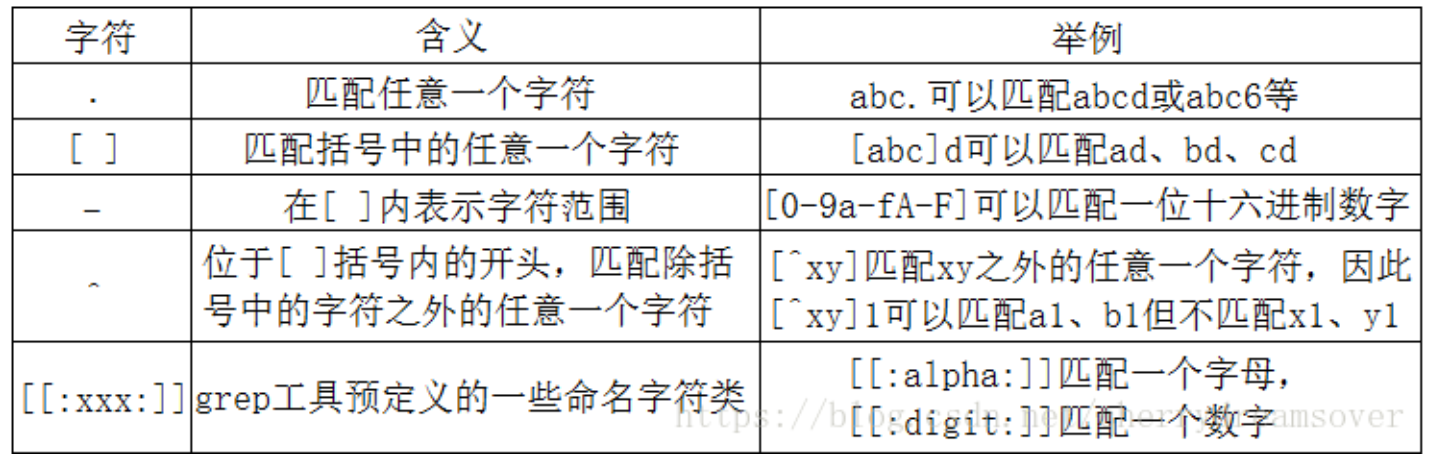

#### 数量定义符
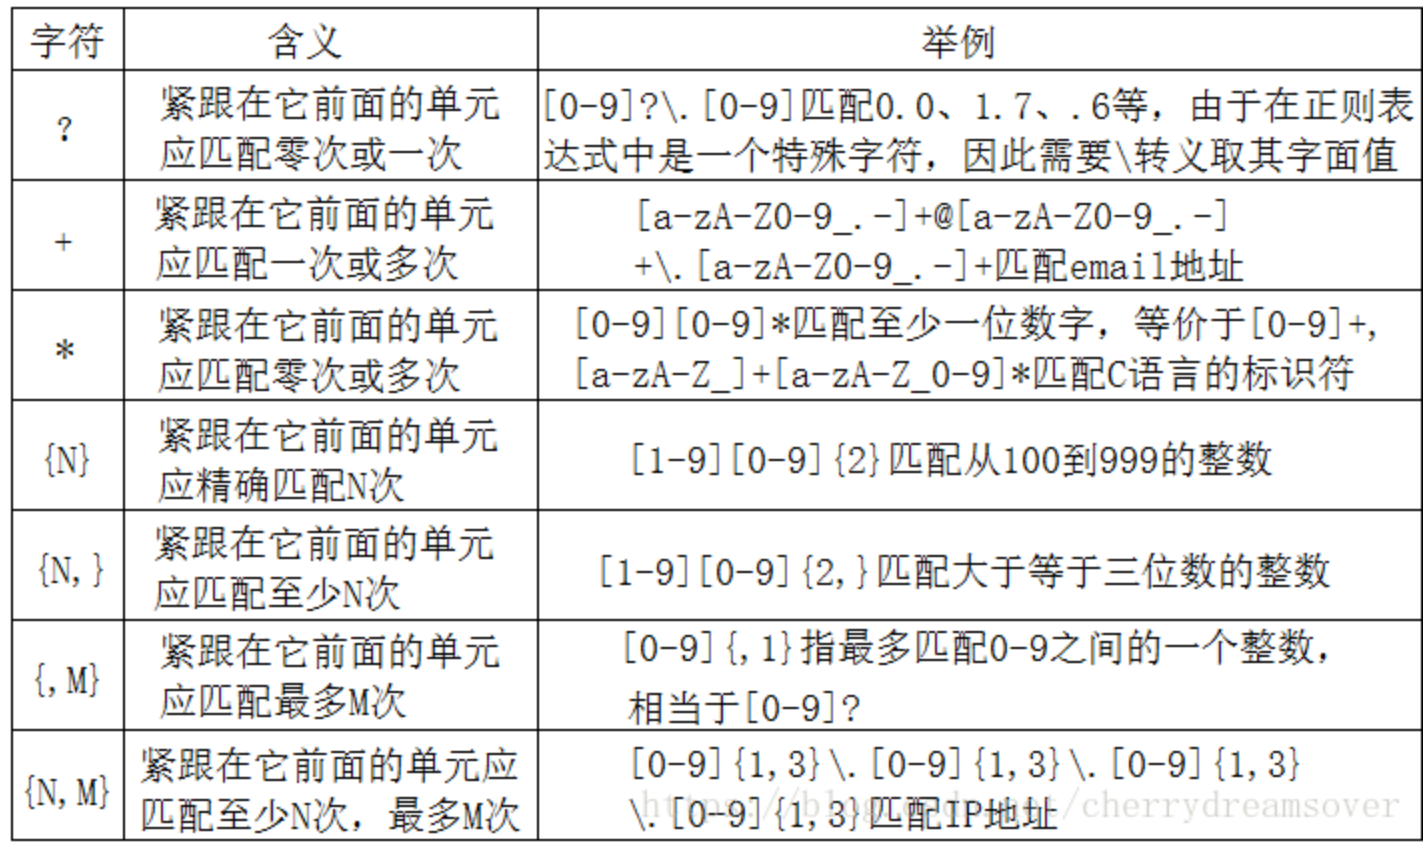

#### 位置限定符图片
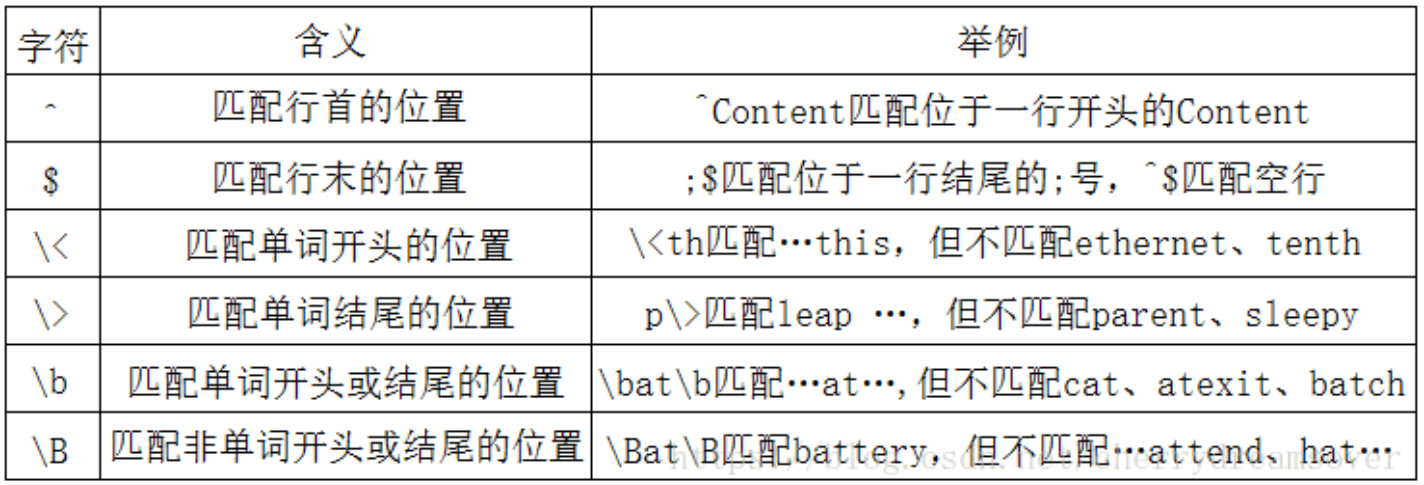

#### 特殊符号
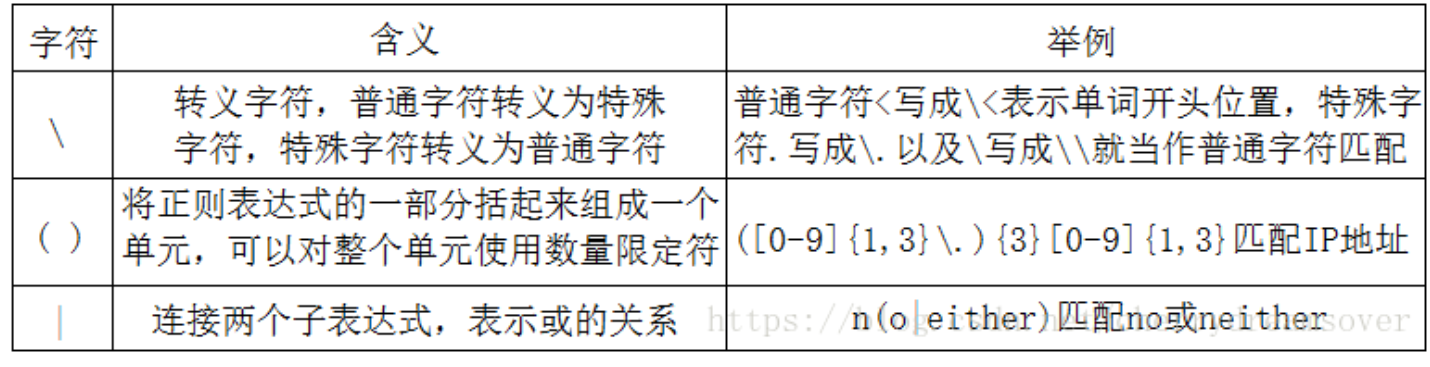

#### 其他字符及其替换
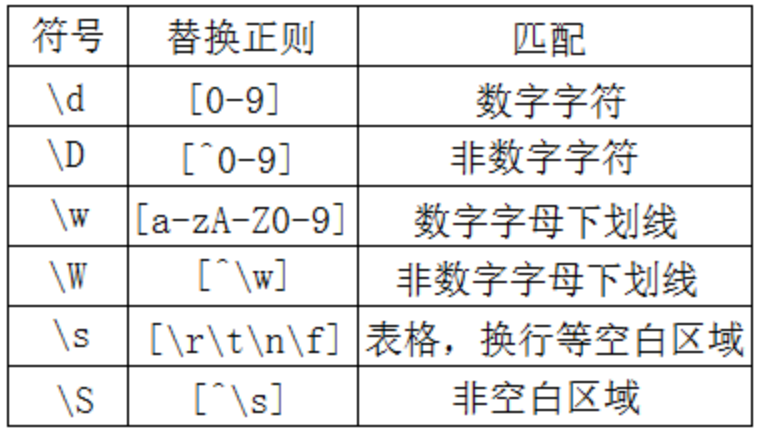

**注：**如果图片未加载，请参考git hub同文件图片

In [39]:
###从Name特征中提取出Tittles的特征
df['Tittle'] = df.Name.str.extract('([A-Za-z]+)\.',expand=False)
                                   
'''使用extract正则表达式从字符串中分组抽取多个字符，返回每个分组形成一列的DataFrame
此次要抽取：出现多次的大小写字母.
根据原名字的格式，Mr/Miss前面是,加上\.表示分割符号后
,expand=False 返回提取后的Index'''
df.head()

'使用extract正则表达式从字符串中分组抽取多个字符，返回每个分组形成一列的DataFrame\n此次要抽取：出现多次的大小写字母.\n根据原名字的格式，Mr/Miss前面是,加上\\.表示分割符号后\n,expand=False 返回提取后的Index'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,Cabin_le,Ticket_le,Tittle
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,147,523,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,81,596,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,147,669,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,55,49,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4,147,472,Mr


In [40]:
df.to_csv('train_2.csv')

### 参考文献：
NaN和None的比较处理：https://www.cnblogs.com/onemorepoint/p/8966791.html

NA值常用操作：https://blog.csdn.net/dss_dssssd/article/details/82814673

缺失值处理方法：https://www.cnblogs.com/Acceptyly/p/3985687.html

查找缺失值的具体位置：https://blog.csdn.net/u010924297/article/details/80060229

Python的map函数应用：https://www.cnblogs.com/lincappu/p/8179475.html

One-hot:https://www.cnblogs.com/shuaishuaidefeizhu/p/11269257.html

其他函数：https://blog.csdn.net/tz_zs/article/details/81355537

《利用Python进行数据分析》等……

## 2.数据重构
数据可能分布在多个文件或数据库中，或不易于分析的格式进行排列。将对数据进行规整，例如连接、联合或重塑等。

由于时间有限，这次先对分层索引（基础）和连接进行学习介绍。

### 2.1 分层索引
分层索引即允许在一个轴向上拥有多个索引层级，提供了一种在更低维度的形式中处理更高维度数据的方式。

In [72]:
### 案例说明
data = pd.DataFrame(np.random.rand(9),index=[['a','a','b','b','b','c','c','d','d'],[1,2,3,1,2,3,4,1,2]],
                   columns=['A'])
data

#分层索引的意义-部分索引
'''外层索引'''
data.loc['c']
'''区间索引'''
data['c':'d']
'''部分截取索引'''
data.loc[['a','c']]

A
a 1  0.428347
  2  0.204543
b 3  0.450636
  1  0.547764
  2  0.093327
c 3  0.296861
  4  0.927584
d 1  0.569004
  2  0.457412

'外层索引'

,A
3,0.296861
4,0.927584


'区间索引'

A
c 3  0.296861
  4  0.927584
d 1  0.569004
  2  0.457412

'部分截取索引'

A
a 1  0.428347
  2  0.204543
c 3  0.296861
  4  0.927584

In [52]:
### 分组索引在重塑数据和数字透视表等分组操作-unstack&stack
'''unstack()意为不要堆叠，意将数据的列索引拆为行索引（默认），
stack()意为堆叠，意将行索引均堆为列索引（默认）'''
data.unstack()
data.unstack().stack()

'unstack()意为不要堆叠，意将数据的列索引拆为行索引（默认），\nstack()意为堆叠，意将行索引均堆为列索引（默认）'

A                              
          1         2         3         4
a  0.995358  0.355915       NaN       NaN
b  0.593177  0.691702  0.762548       NaN
c       NaN       NaN  0.151127  0.398876
d  0.240856  0.343456       NaN       NaN

A
a 1  0.995358
  2  0.355915
b 1  0.593177
  2  0.691702
  3  0.762548
c 3  0.151127
  4  0.398876
d 1  0.240856
  2  0.343456

In [89]:
###多层索引可以命名
frame = pd.DataFrame(np.arange(12).reshape(4,3),
                    index = [['b','a','b','a'],[1,2,1,2]],
                    columns = [['O','O','H'],['Y','U','I']])
frame

frame.index.names =['in1','in2']    #重命名index
frame.columns.names =['col1','col2']#重命名columns
frame


O       H
     Y   U   I
b 1  0   1   2
a 2  3   4   5
b 1  6   7   8
a 2  9  10  11

col1     O       H
col2     Y   U   I
in1 in2           
b   1    0   1   2
a   2    3   4   5
b   1    6   7   8
a   2    9  10  11

### 2.1.1 重排序和层级排序
重新排列轴上的层及顺序，或按照特定层级的值对数据进行排序。

`swaplevel`接受两个层级序号或层级名称，返回一个进行了层级变更的新对象，数据不变。

In [90]:
### 案例说明
frame
frame.swaplevel(axis=0) #行进行了交换，括号内也可以改为(in1,in2)或(0,1)
'''交换索引后可以外部索引2，如果直接索引2则不成立'''
frame.swaplevel(axis=0).loc[2] 

col1     O       H
col2     Y   U   I
in1 in2           
b   1    0   1   2
a   2    3   4   5
b   1    6   7   8
a   2    9  10  11

col1     O       H
col2     Y   U   I
in2 in1           
1   b    0   1   2
2   a    3   4   5
1   b    6   7   8
2   a    9  10  11

'交换索引后可以外部索引2，如果直接索引2则不成立'

col1  O       H
col2  Y   U   I
in1            
a     3   4   5
a     9  10  11

In [93]:
###单一层级上对数据进行排序
frame.sort_index(level=0) #同过level指定第0个index进行排序，或者level='in1'
frame.sort_index(level=1) #第1个index进行排序

col1     O       H
col2     Y   U   I
in1 in2           
a   2    3   4   5
    2    9  10  11
b   1    0   1   2
    1    6   7   8

col1     O       H
col2     Y   U   I
in1 in2           
b   1    0   1   2
    1    6   7   8
a   2    3   4   5
    2    9  10  11

### 2.1.2 使用DataFrame的列进行索引
这个也比较常用有些意思，在数据集中发现列有独特的属性，可以以这列作为索引。
- `set_index(['list1,list2'],drop=True)`:以list1,list2为索引，默认drop为True即移除这两列。
- `reset_index`:`set_index`的反操作，分层索引的索引层级会被移动到列中。

In [94]:
df_name = df.set_index(['Name'],drop=False)
df_name.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,Cabin_le,Ticket_le,Tittle
Name,,,,,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,147,523,Mr
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,81,596,Mrs
"Heikkinen, Miss. Laina",3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,147,669,Miss
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,55,49,Mrs
"Allen, Mr. William Henry",5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4,147,472,Mr


### 2.2 联合与合并数据集
- `pd.merge()`:可以根据一个或多个键将行进行连接，对于SQL或其他关系型数据库的连接实现。
- `pd.concat()`:使对象在轴向上进行黏合或“堆叠”。（本章介绍）
- `combine_first`:实例方法允许将重叠的数据接在一起，使用一个对象中的值填充另一个对象中的缺失值。

本次先介绍前二种进行数据的合并，以后会扩充另一种或多种。

In [95]:
### 将几张表进行简单合并
text_left_up = pd.read_csv("train-left-up.csv")
text_left_down = pd.read_csv("train-left-down.csv")
text_right_up = pd.read_csv("train-right-up.csv")
text_right_down = pd.read_csv("train-right-down.csv")

In [96]:
## 查看下数据集
text_left_up.head()
text_left_down.head()
text_right_up.head()
text_right_down.head()

,PassengerId,Survived,Pclass,Name
0,1,0,3,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,"Allen, Mr. William Henry"


,PassengerId,Survived,Pclass,Name
0,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson"
1,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)"
2,442,0,3,"Hampe, Mr. Leon"
3,443,0,3,"Petterson, Mr. Johan Emil"
4,444,1,2,"Reynaldo, Ms. Encarnacion"


,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,female,35.0,1.0,0.0,113803,53.1000,C123,S
4,male,35.0,0.0,0.0,373450,8.0500,NaN,S


,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,male,31.0,0,0,C.A. 18723,10.500,NaN,S
1,female,45.0,1,1,F.C.C. 13529,26.250,NaN,S
2,male,20.0,0,0,345769,9.500,NaN,S
3,male,25.0,1,0,347076,7.775,NaN,S
4,female,28.0,0,0,230434,13.000,NaN,S


In [97]:
###将上述几张表合为一张表-根据共同的结构合并
list_up = [text_left_up,text_right_up]
list_down = [text_left_down,text_right_down]
up = pd.concat(list_up,axis=1)
down = pd.concat(list_down,axis=1)
result = pd.concat([up,down])
result.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


#### 小结
因为主办方比较仁慈，所选择合并的数据表没有重叠或缺失等问题。一般而言`concat`函数另有几个参数经常应用，如下表：

| 参数       | 描述         | 应用    |
|:-----------:| :-------------:|:-------------:|
| `objs` | 要连接的对象，必选参数  | 首填，[]内，两个起 |
| `axis` | 连接的轴向  | 0为行方向，1为纵方向 |
| `join` | 指定连接的方式（内外连接）  | `inner`为内连接-交集，`outer`为外连接 |
| `join_axes` | 指定其他n-1轴的特定索引，可替代内外连接逻辑  | 单个或多个[]内部填写想知道的轴 |
| `keys` | 连接对象的数据集，沿着连接轴形成分层索引  | 例如多个数据表连接，常与names连用 |
| `names` | 若传入了Keys或levels，用于层级名称  | `names=['',''] `|
| `leels` | 键值传递时，用于指定多层索引的层级  | 暂无，用的少，目测可以结合level |
| `ignore_index` | 不沿着连接轴保留索引，产生新的索引  | `ignore_index`=True|

In [100]:
### DataFrame自带join和append
result_up = text_left_up.join(text_right_up)
result_down = text_left_down.join(text_right_down)
result = result_up.append(result_down)  
result.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


In [101]:
### pd.merge()和pd.append方法
result_up = pd.merge(text_left_up,text_right_up,left_index=True,right_index=True)
result_down = pd.merge(text_left_down,text_right_down,left_index=True,right_index=True)
result = resul_up.append(result_down)
result.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


`pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)`
- `left`: 拼接的左侧DataFrame对象
- `right`: 拼接的右侧DataFrame对象
- `on`: 要加入的列或索引级别名称。 必须在左侧和右侧DataFrame对象中找到。 如果未传递且left_index和right_index为False，则DataFrame中的列的交集将被推断为连接键。
- `left_on`:左侧DataFrame中的列或索引级别用作键。 可以是列名，索引级名称，也可以是长度等于DataFrame长度的数组。
- `right_on`: 左侧DataFrame中的列或索引级别用作键。 可以是列名，索引级名称，也可以是长度等于DataFrame长度的数组。
- `left_index`: 如果为True，则使用左侧DataFrame中的索引（行标签）作为其连接键。 对于具有MultiIndex（分层）的DataFrame，级别数必须与右侧DataFrame中的连接键数相匹配。
- `right_index`: 与left_index功能相似。
- **how: One of ‘left’, ‘right’, ‘outer’, ‘inner’.** 默认inner。inner是取交集，outer取并集。
- `sort`: 按字典顺序通过连接键对结果DataFrame进行排序。 默认为True，设置为False将在很多情况下显着提高性能。
- `suffixes`: 用于重叠列的字符串后缀元组。 默认为（‘x’，’ y’）。
- `copy`: 始终从传递的DataFrame对象复制数据（默认为True），即使不需要重建索引也是如此。
- `indicator`:将一列添加到名为_merge的输出DataFrame，其中包含有关每行源的信息。 _merge是分类类型，并且对于其合并键仅出现在“左”DataFrame中的观察值，取得值为left_only，对于其合并键仅出现在“右”DataFrame中的观察值为right_only，并且如果在两者中都找到观察点的合并键，则为left_only。

**注：**merge()函数是数据库类型连接，属于左右连接，这次案例包含上下连接，不能单用merge()函数。

### 数据聚合与运算

对数据进行分类，并在每一组上应用一个聚合函数或转换函数，是数据分析工作流中的一个重要部分。在载入、合并、准备数据后，需要计算分组统计或者数据透视表用于可视化。

In [104]:
text = pd.read_csv('result.csv')
text.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


### Groupby()函数
首先介绍下groupby函数的常见用法：

| 函数	| 适用场景	| 备注| 
|:-----------:| :-------------:|:-------------:|
| `df.groupby('key')` |	一列聚合 |	分组键为列名（可以是字符串、数字或其他Python对象） |
| `df.groupby(['key1','key2'])` |	多列聚合	 |分组键为列名，引入列表`list[]` |
| `df['data1'].groupby(df['key1']).mean()`	 |按某一列进行一重聚合求均值 |	分组键为Series |
|` A=df['订单编号'].groupby([ df['运营商'], df['分类'], df['百度圣卡'] ]).count()`	 |按某一列进行多重聚合计数 |	分组键为Series，引入列表`list[]`
| `df['data1'].groupby([states,years]).mean()` |	分组键与原df无关，而是另外指定的任何长度适当的数组	 |分组键是数组，state和year均为数组

### 参考文献

分层索引：https://www.cnblogs.com/jaysonteng/p/13475618.html

数据合并函数：https://blog.csdn.net/brucewong0516/article/details/82707492